<a href="https://colab.research.google.com/github/adaryass/Deep-Learning/blob/main/PROGRAMMATION_d'un_NEURONE_ARTIFICIEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## 1. Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


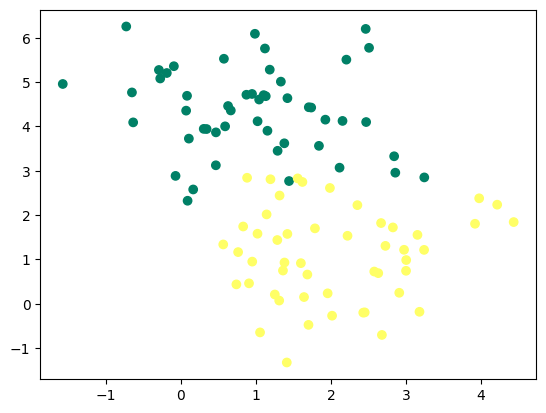

In [ ]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

## 2. Fonctions du modele

In [ ]:
def initialisation(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)

In [ ]:
W, b = initialisation(X)
W.shape, b.shape


((2, 1), (1,))

In [ ]:
W

array([[-0.10991299],
       [-0.68363699]])

In [ ]:
def model(X, W, b):
  Z = X.dot(W) + b
  A = 1/(1 + np.exp(-Z))
  return A

In [ ]:
A = model(X, W, b)
A.shape

(100, 1)

In [ ]:
def log_loss(A, y):
  return (- 1 / len(y)) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

In [ ]:
log_loss( A, y)

np.float64(0.7022873171184867)

In [ ]:
def gradients (A, X, y):
  dW = (1 / len(y)) * np.dot(X.T, A - y)
  db = (1 / len(y)) * np.sum(A - y)
  return (dW, db)

In [ ]:
dW, db = gradients(A, X, y)
dW.shape, db.shape

((2, 1), ())

In [ ]:
def update(dW, db, W , b , learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)

In [ ]:
W.shape, b.shape

((2, 1), (1,))

In [ ]:
def predict(X, W, b):
  A = model(X, W, b)
  print(A)
  return A >= 0.5

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
  # intialisation W, b
  W, b = initialisation(X)

  history = []
  Loss = []

# Training
  for i in range(n_iter):
    A = model(X, W , b)
    Loss.append(log_loss(A, y))
    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate)
    history.append((W, b, Loss, i))

  y_pred = predict(X, W, b)
  print(accuracy_score(y, y_pred))

  plt.plot(Loss)
  plt.show()

  return history

0.87


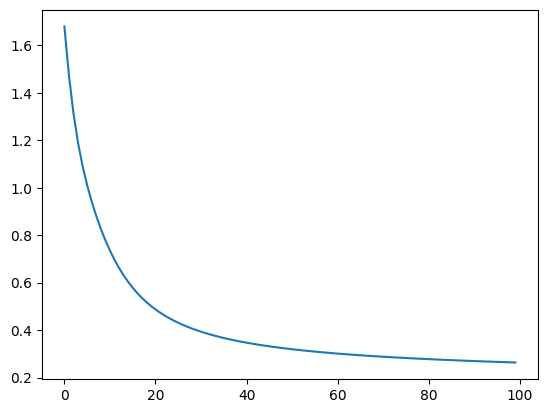

In [ ]:
W, b = artificial_neuron(X,y)

## 3. Frontiere de décision

In [ ]:
W, b

(array([[ 1.26008257],
        [-0.89701893]]),
 array([0.02906887]))

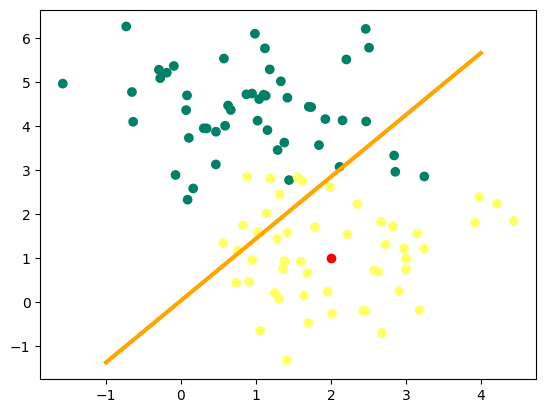

[0.8391902]


array([ True])

In [ ]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = -(W[0] * x0 + b) / W[1]


plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3) # Afficher la frontière efficiente

plt.show()
predict(new_plant, W, b)

## 4. Visualisations 3D

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data =[go.Scatter3d(
    x = X[:, 0].flatten(),
    y = X[:, 1].flatten(),
    z = y.flatten(),
    mode = 'markers',
    marker = dict(
        size = 5,
        color = y.flatten(),
        colorscale = 'YlGn',
        opacity = 0.8,
        reversescale = True
    )
)])

fig.update_layout(template = "plotly_dark", margin= dict(l=0, r=0, t=0, b=0), scene = dict(camera = dict(projection = dict(type = 'orthographic'))))
fig.show()

In [ ]:
x0 = np.linspace(X[:,0].min(), X[:, 0].max(), 100)
x1 = np.linspace(X[:,1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(x0, x1)
Z = W[0]*xx0 + W[1]*xx1 + b
A = 1/(1 + np.exp(-Z))

fig = (go.Figure(data = [go.Surface(z=A, x = xx0, y = xx1, colorscale='YlGn', opacity= 0.7, reversescale= True)]))

fig.add_scatter3d(x = X[:, 0].flatten(), y = X[:, 1].flatten(), z = y.flatten(), mode = 'markers', marker = dict(size = 5, color = y.flatten(), colorscale = 'YlGn', opacity = 0.9, reversescale = True))

fig.update_layout(template = "plotly_dark", margin= dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()